# Jan 2023 Cu B

IPTS-29196

| |January Cu-B dTHF no EtOH | Cu-K dTHF + EtOH|Cu-F dTHF + dEtOH|Cu-G THF + dEtOH|
|---|---|---|---|---|
|OCV 1| 201282 |207268|207161|207194|
|CP 1| 201289| 207275|207168|207201|
|OCV 2| 201290 |207282|207169|207202|
|OCV 3|201298|207296|207177|207210|
|OCV 4|201306|207304|207187|207218|
|OCV 5|201334|| |



In [2]:
import sys
import os
import time
import numpy as np
np.random.seed(42)

import json

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
git_dir = os.path.join(os.path.expanduser('~'), 'git', 'nh3-analysis')

from refl1d.names import *
from refl1d import errors

from bumps.fitters import fit

import importlib

import copper_sample as cu

importlib.reload(cu)

<module 'copper_sample' from '/Users/mathieu/git/nh3-analysis/jan2023/notebooks/copper_sample.py'>

In [22]:
import csv 

with_abs = "/Users/mathieu/Downloads/Cu-B-abs_ultranest_results.csv"
no_abs = "/Users/mathieu/Downloads/Cu-B-no-abs_ultranest_results.csv"

z_abs = 0
z_no_abs = 0

with open(with_abs, newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] == 'logz':
            z_abs = float(row[1])
            break

with open(no_abs, newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csv_reader:
        if row[0] == 'logz':
            z_no_abs = float(row[1])
            break

print("log(Z) with absorption: ", z_abs)
print("log(Z) without absorption: ", z_no_abs)
bayes_factor = np.exp(z_abs - z_no_abs)


print("K = %.2f" % bayes_factor)
print("The aborption model is %.2f times more probable than the no-signal model" % bayes_factor)


log(Z) with absorption:  -192.54358500886167
log(Z) without absorption:  -203.1167094567491
K = 39070.56
The aborption model is 39070.56 times more probable than the no-signal model


215
chi2 with absorption:  1.3801250119446409
chi2 without absorption:  1.4866111226270928


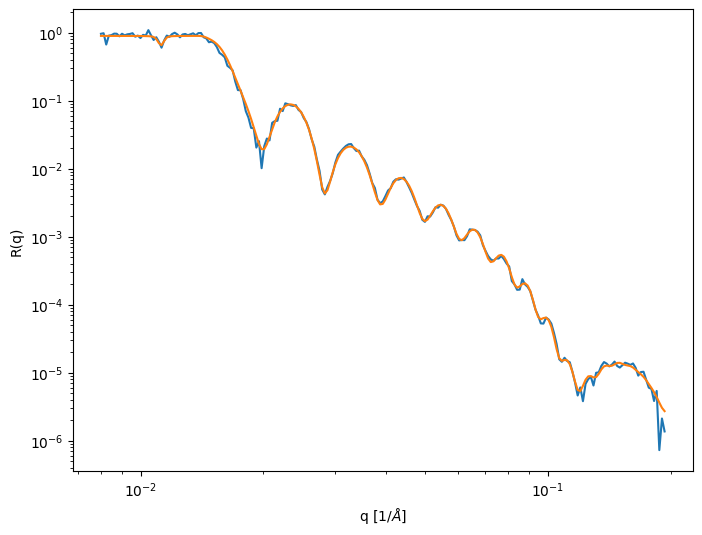

In [23]:
refl_no_abs = "/Users/mathieu/Downloads/Cu-B-no-abs/Cu-B-no-abs-model-refl.dat"
refl_with_abs = "/Users/mathieu/Downloads/Cu-B-abs/Cu-B-abs-model-refl.dat"

data_with_abs = np.loadtxt(refl_with_abs).T
data_no_abs = np.loadtxt(refl_no_abs).T

chi2_abs = np.sum((data_with_abs[2] - data_with_abs[4])**2/data_with_abs[3]**2)/(len(data_with_abs[2])-17)
chi2_no_abs = np.sum((data_no_abs[2] - data_no_abs[4])**2/data_no_abs[3]**2)/(len(data_no_abs[2])-16)

print(len(data_with_abs[2]))
print("chi2 with absorption: ", chi2_abs)
print("chi2 without absorption: ", chi2_no_abs)


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

plt.plot(data_with_abs[0], data_with_abs[2])
plt.plot(data_with_abs[0], data_with_abs[4])
plt.gca().legend(frameon=False)
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'SLD')

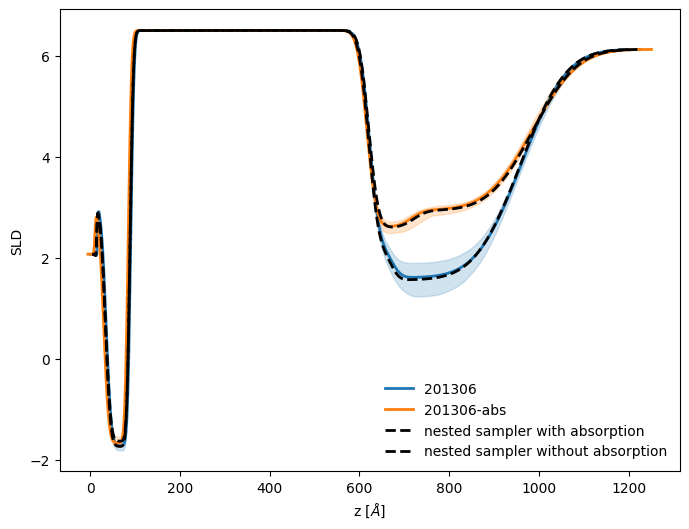

In [38]:
data_list = ['201282', '201290-abs', '201298-abs', '201306-abs']
data_list = ['201306', '201306-abs']

profile_with_abs = "/Users/mathieu/Downloads/Cu-B-no-abs/Cu-B-no-abs-model-profile.dat"
profile_no_abs = "/Users/mathieu/Downloads/Cu-B-abs/Cu-B-abs-model-profile.dat"

z_offset = [0, -5]


fig, axs = plt.subplots(1,1, dpi=100, figsize=(8,6), sharex=False)

for i, run in enumerate(data_list):
    ocv_fit = os.path.join(git_dir, 'jan2023', 'data', 'results', 'REFL_%s.json' % run)

    with open(ocv_fit, 'r') as f:
        data = json.load(f)    
        plt.plot(np.asarray(data['z'])+z_offset[i], data['sld'], markersize=4, label=run, linewidth=2,)
        plt.fill_between(np.asarray(data['z'])+z_offset[i], data['sld_low'], data['sld_high'], alpha=0.2, color=plt.gca().lines[-1].get_color())

sld_data = np.genfromtxt(profile_with_abs, skip_header=1)
plt.plot(-sld_data[:,0]+sld_data[-1][0]+5, sld_data[:,1], label='nested sampler with absorption', linewidth=2, linestyle='--', color='black')

sld_data = np.genfromtxt(profile_no_abs, skip_header=1)
plt.plot(-sld_data[:,0]+sld_data[-1][0]+5, sld_data[:,1], label='nested sampler without absorption', linewidth=2, linestyle='--', color='black')


plt.gca().legend(frameon=False)
plt.xlabel('z [$\AA$]')
plt.ylabel('SLD')